# Figures 2 and 3 
## Replication

This file replicates Figures 2 and 3 from Sexton, Renard. "Aid as a tool against insurgency: Evidence from contested and controlled territory in Afghanistan." American Political Science Review 110, no. 4 (2016): 731-749. 

---

## Load libraries

In [16]:
# pip install fuzzywuzzy

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from fuzzywuzzy import process

## File path [edit]

Edit the file path, then run the code without edits.

In [3]:
cd = "/Users/rachelhaswell/Documents/pol econ/replication/aidasatool/"

## Examine the data

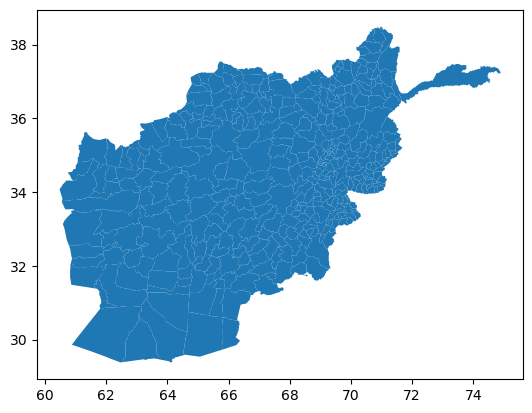

In [4]:
# Define path to Afghanistan shp file
shapefile_path = cd + "shp/polbnda_afg.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the GeoDataFrame
gdf.plot()

# Display the plot
plt.show()

In [5]:
# Define the path to Aid dataset
dataset_path = cd + "data/sexton-afg-apsr.dta"

# Read the Stata dataset
df = pd.read_stata(dataset_path)

# Display the first few rows of the DataFrame
df.head()


,districtid,district,province,week,pop10k,troops,CERPdummy,region,CERPdollars_pcap,CERPdollars_large_pcap,...,CERPdollars_11_pcap,CERPdollars_12_pcap,CERPdollars_13_pcap,CERPdollars_19_pcap,CERPdollars_20_pcap,type3_pcap_neighbor,type18_pcap_neighbor,type19_pcap_neighbor,defuse_pcap,defuse2_pcap
0,1.0,Ab Band,Ghazni,0.0,2.63,0,0.0,Eastern,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087336,0.0,0.0
1,2.0,Ab Kamari,Badghis,0.0,7.04,0,0.0,Western,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3.0,Achin,Nangarhar,0.0,9.59,0,1.0,Eastern,0.018248,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,4.0,Adraskan,Herat,0.0,5.14,0,1.0,Western,0.006468,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,5.0,Ahmadabad,Paktia,0.0,2.67,0,1.0,Eastern,0.006148,0.010204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [6]:
# Get unique district names from the DataFrame
df_districts = set(df['district'])

# Get unique district names from the shapefile
shp_districts = set(gdf['laa'])

# Find districts in the DataFrame but not in the shapefile
missing_districts = df_districts - shp_districts

# Print the missing districts
print("Districts in the DataFrame but not in the shapefile:")
for district in missing_districts:
    print(district)


Districts in the DataFrame but not in the shapefile:
Musa Khel
Muhammad Agha
Dara-i-Sufi Bala
Shekh Ali
Spera
Dasht-e Archi
Jadran
Jaji
Baharak-T
Lal wa Sarjangal
Qala-i-Naw
Shiki
Hisa-i-Awali Bihsud
Dara-i-Pech
Lal Pur
Khost
Sabari
Shuhada
Ahmadabad
Darwazi Bala
Murghab
Kushki Kuhna
Dand wa Patan
Gardez
Khan Abad
Khuram wa Sarbagh
Fayz Abad
Kalafgan
Sirkanay
Mahmud Raqi
Sherzad
Tishkan
Pachir wa Agam
Kiti
Sayid Karam
Arghandab-Z
Dawlatabad-B
Dara-i-Nur
Lash wa Juwayn
Ishkashim
Kushk
Yamgan
Shwak
Khushi
Nuristan
Mingajik
Dih Bala
Khwaja Hijran
Arghandab-K
Achin
Qalay-i-Zal
Jaji Maydan
Ghorband
Reg
Dawlat Shah
Tarnak wa Jaldak
Shaygal wa Shiltan
Khogyani
Khost wa Firing
Lija Mangal
Qala-i-Kah
Sayd Abad
Khamyab
Ragh
Dara-i-Suf Payin
Dahana-i-Ghori
Hisarak
Arghanj Khwa
Yaftali Sufla
Kuran wa Munjan
Wor Mamay
Tala wa Barfak
Zinda Jan
Hisa-i-Awali Panjsher
Nawa-i-Barak Zayi
Jalal Abad
Ali Abad


In [7]:
# List of district names from the shapefile
shp_districts_list = list(gdf['laa'])

# Dictionary to store fuzzy matched district names
fuzzy_matches = {}

# Perform fuzzy matching for each district in the DataFrame
for district in missing_districts:
    matched_district, score = process.extractOne(district, shp_districts_list)
    fuzzy_matches[district] = matched_district

# Create a new DataFrame with the district names and their fuzzy matched names
fuzzy_matches_df = pd.DataFrame(list(fuzzy_matches.items()), columns=['dta_district', 'shp_district'])

# Display the fuzzy matched DataFrame
print(fuzzy_matches_df.to_string(index=False))


         dta_district              shp_district
            Musa Khel                 Sayd Khel
        Muhammad Agha             Mohammad Agha
     Dara-i-Sufi Bala          Dara-I-Sufi Bala
            Shekh Ali                Shekh  Ali
                Spera                     Spira
        Dasht-e Archi              Dashte Archi
               Jadran                    Zadran
                 Jaji          Ali Khail (Jaji)
            Baharak-T                   Baharak
     Lal wa Sarjangal          Lal Wa Sarjangal
           Qala-i-Naw               Qala-I- Naw
                Shiki                     Shaki
  Hisa-i-Awali Bihsud      Hisa-I- Awali Bihsud
          Dara-i-Pech               Dara-I-Pech
              Lal Pur          Lal Wa Sarjangal
                Khost           Khost Wa Firing
               Sabari                     Sabri
              Shuhada                   Shahada
            Ahmadabad                Ahmad Abad
         Darwazi Bala                Dar

In [8]:
# Create a dictionary mapping the original district names to their matched names from the shapefile
rename_dict = dict(zip(fuzzy_matches_df['dta_district'], fuzzy_matches_df['shp_district']))

# Update district names in the DataFrame with the matched values from the shapefile
df['district'] = df['district'].map(rename_dict).fillna(df['district'])

# Display the updated DataFrame
print(df)


       districtid    district    province   week  pop10k  troops  CERPdummy  \
0             1.0     Ab Band      Ghazni    0.0    2.63       0        0.0   
1             2.0   Ab Kamari     Badghis    0.0    7.04       0        0.0   
2             3.0      Nahrin   Nangarhar    0.0    9.59       0        1.0   
3             4.0    Adraskan       Herat    0.0    5.14       0        1.0   
4             5.0  Ahmad Abad      Paktia    0.0    2.67       0        1.0   
...           ...         ...         ...    ...     ...     ...        ...   
55039       392.0       Zebak  Badakhshan  138.0    0.75       0        0.0   
55040       393.0       Zhari    Kandahar  138.0    8.20       1        0.0   
55041       394.0  Zanda  Jan       Herat  138.0    5.46       0        0.0   
55042       395.0       Ziruk     Paktika  138.0    1.84       0        0.0   
55043       396.0      Zurmat      Paktia  138.0   10.28       0        2.0   

        region  CERPdollars_pcap  CERPdollars_large

## Figure 2 replication

In [9]:
# Group by district and calculate the sum of CERPdollars_pcap
collapsed_df = df.groupby('district')['CERPdollars_pcap'].sum().reset_index()


In [10]:
# Merge the shapefile GeoDataFrame with the collapsed DataFrame based on the district information
merged_df = gdf.merge(collapsed_df, left_on='laa', right_on='district')


In [11]:
# Define bins for categorization
bins = [0, 1, 100, 1663]
labels = ['0-1', '1-100', '100-1663']

# Create a new column to categorize CERPdollars_pcap
merged_df['CERPdollars_pcap_category'] = pd.cut(merged_df['CERPdollars_pcap'], bins=bins, labels=labels, right=False)


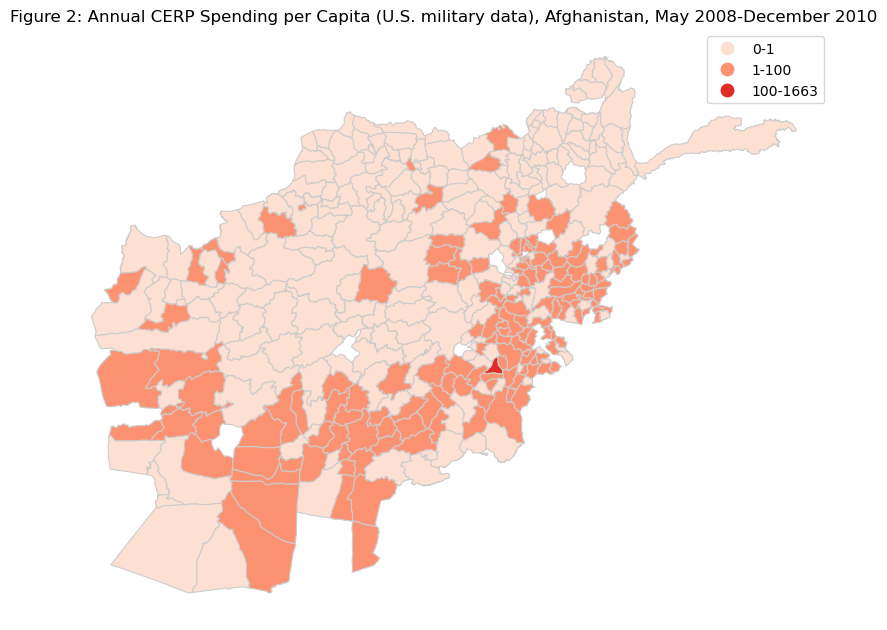

In [12]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Define colors for the categories
colors = ['#fee0d2', '#fc9272', '#de2d26']
cmap = ListedColormap(colors)

# Plot the map using the categorized column
merged_df.plot(column='CERPdollars_pcap_category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
ax.set_title('Figure 2: Annual CERP Spending per Capita (U.S. military data), Afghanistan, May 2008-December 2010')
plt.savefig(cd + 'outputs/cerp_spending_map.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure 3 replication

In [13]:
# Create a new column that adds type18_pcap and type19_pcap
df['total_attacks'] = df['type18_pcap'] + df['type19_pcap']

# Multiply the new variable by 10,000 to get attacks per 10,000
df['attacks_per_10000'] = df['total_attacks']*df['pop10k']

# Collapse the variable by district
attacks_per_10000 = df.groupby('district')['attacks_per_10000'].sum().reset_index()

# Display the first few rows of the collapsed DataFrame
attacks_per_10000.head()

,district,attacks_per_10000
0,Ab Band,51.0
1,Ab Kamari,4.0
2,Adraskan,30.0
3,Ahmad Abad,16.0
4,Ajristan,14.0


In [14]:
# Merge the shapefile GeoDataFrame with the attacks per 10,000 DataFrame based on the district information
merged_df = gdf.merge(attacks_per_10000, left_on='laa', right_on='district')
merged_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,district,attacks_per_10000
0,FA001,AFG,Faryab,Qurghan,-99999999,0,UNK,UNK,AFG,"POLYGON Z ((65.10242 36.95269 0.00000, 65.1022...",Qurghan,1.0
1,FA001,AFG,Faryab,Qaramqol,-99999999,0,UNK,UNK,AFG,"POLYGON Z ((64.81122 36.94867 0.00000, 64.8146...",Qaramqol,2.0
2,FA001,AFG,Faryab,Dawlatabad,-99999999,0,UNK,UNK,AFG,"POLYGON Z ((65.34920 36.73668 0.00000, 65.3518...",Dawlatabad,14.0
3,FA001,AFG,Balkh,Dawlatabad,-99999999,0,UNK,UNK,AFG,"POLYGON Z ((66.43886 37.19798 0.00000, 66.4386...",Dawlatabad,14.0
4,FA001,AFG,Faryab,Shirin Tagab,-99999999,0,UNK,UNK,AFG,"POLYGON Z ((64.85984 36.38473 0.00000, 64.8602...",Shirin Tagab,33.0


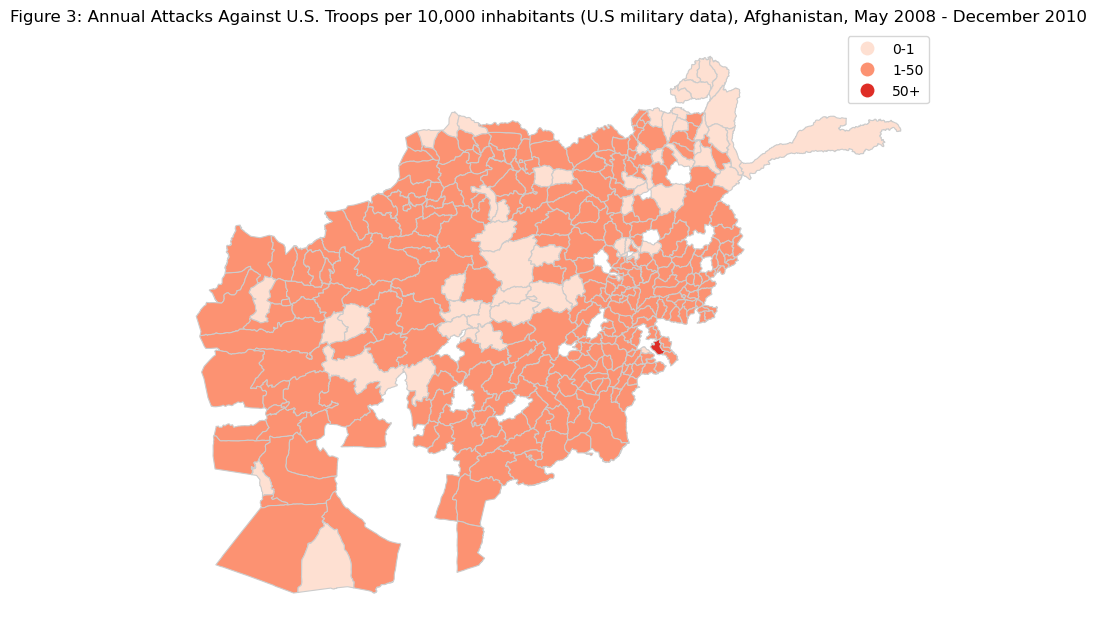

In [15]:
# Define bins and categories
bins = [0, 1, 500, 528]
labels = ['0-1', '1-50', '50+']

# Create a new column to categorize the attacks per 10,000
merged_df['attacks_per_10000_category'] = pd.cut(merged_df['attacks_per_10000'], bins=bins, labels=labels, right=False)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Define colors for the categories
colors = ['#fee0d2', '#fc9272', '#de2d26']
cmap = ListedColormap(colors)

# Plot the map using the categorized column
merged_df.plot(column='attacks_per_10000_category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
ax.set_title('Figure 3: Annual Attacks Against U.S. Troops per 10,000 inhabitants (U.S military data), Afghanistan, May 2008 - December 2010')
plt.savefig(cd + 'outputs/attacks_map.png', dpi=300, bbox_inches='tight')
plt.show()